# PROYECTO: Prevención de Abandono (CHURN) | Script AI

## Entendimiento de Negocio | Entendimiento de Datos

## 1. ESTUDIO Y ENTENDIMIENTO DEL NEGOCIO

## 2. ESTUDIO Y ENTENDIMIENTO DE LOS DATOS

Se nos presentan dos conjuntos de datos o **datasets**. 
- CHURN-HIST.csv
- CHURN-NEW.csv

El primero es el dataset que utilizaremos para entrenar a nuestro modelo y el segundo nos servirá para evaluar el resultado de nuestro modelo, con datos que nunca ha visto.
Este estudio de los datos lo realizaré en Python, ya que considero que es la herramienta más dinámica que hay actualmente para hacer este tipo de análisis.

### VISTAZO GENERAL DEL DATASET

In [1]:
# Importamos las librerías necesarias para este análisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("CHURN-HIST.csv") # Leemos nuestro CSV

In [3]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [4]:
df.shape # Vemos que nuestro dataset cuenta de 6338 filas y 21 columnas

(6338, 21)

In [5]:
df.info() # float64 son decimales; int64 son entero; object son strings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6338 non-null   object 
 1   gender            6338 non-null   object 
 2   SeniorCitizen     6338 non-null   int64  
 3   Partner           6338 non-null   object 
 4   Dependents        6338 non-null   object 
 5   tenure            6338 non-null   int64  
 6   PhoneService      6338 non-null   object 
 7   MultipleLines     6338 non-null   object 
 8   InternetService   6338 non-null   object 
 9   OnlineSecurity    6338 non-null   object 
 10  OnlineBackup      6338 non-null   object 
 11  DeviceProtection  6338 non-null   object 
 12  TechSupport       6338 non-null   object 
 13  StreamingTV       6338 non-null   object 
 14  StreamingMovies   6338 non-null   object 
 15  Contract          6338 non-null   object 
 16  PaperlessBilling  6338 non-null   object 


In [6]:
df.describe() # Sacamos las estadísticas básicas de las columnas numéricas
# En este caso tenemos 4 columnas numéricas; 2 int64 y 2float64

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,6338.000000,6338.000000,6338.000000,6330.000000
mean,0.159041,32.370464,64.541835,2276.766951
std,0.365743,24.614433,30.072933,2264.050850
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.200000,392.537500
50%,0.000000,29.000000,70.275000,1397.950000
75%,0.000000,55.000000,89.750000,3801.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
df.isna().sum() # Podemos ver que tenemos 8 nulos en TotalCharges

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

### ANÁLISIS DE LAS COLUMNAS

### ¿Cuál es el Problema?

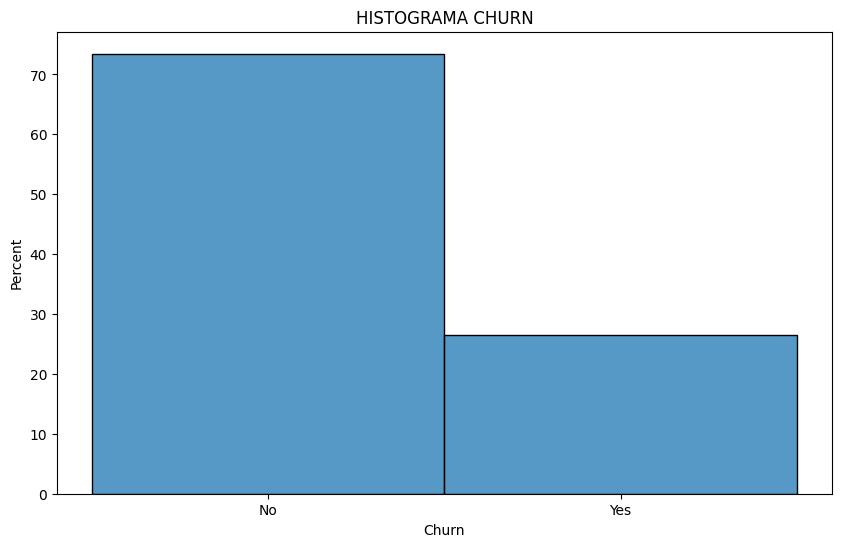

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(df['Churn'], stat='percent')
plt.title("HISTOGRAMA CHURN")
plt.show()

En esta gráfica podemos ver que tenemos más de un 70% de personas que NO abandonan, mientras que tenemos casi un 30% de personas que abandonan. Nos enfocaremos en ese segmento de clientes para conseguir bajar el porcentaje de Yes y subir el de NO.

#### Sólo con echar un vistazo a las columnas que tenemos, podemos deducir que las 3 columnas que más influyen en el CHURN son: 
- **Tenure** (Meses de Antigüedad)
- **Monthly Charges** (Dinero que pagan al mes)
- **Contract** (El contrato que tienen)

Nos centraremos en ellas.

### MONTHLY CHARGES
Importe de la factura mensual

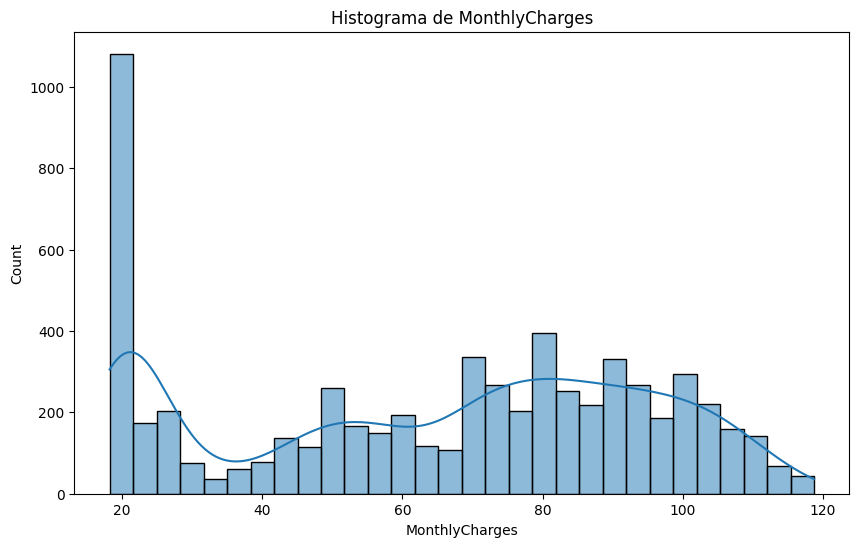

El valor máximo en la columnas Monthly Charges es: 118.75
El valor mínimo en la columna Monthly Charges es: 18.25


In [9]:
# Vamos a investigar los MonthlyCharges
# Los MonthlyCharges es: Importe de la factura mensual
# HISTOGRAMA
plt.figure(figsize=(10,6))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title("Histograma de MonthlyCharges")
plt.show()

max_value = df['MonthlyCharges'].max()
min_value = df['MonthlyCharges'].min()
print(f"El valor máximo en la columnas Monthly Charges es: {max_value}")
print(f"El valor mínimo en la columna Monthly Charges es: {min_value}")

Aquí podemos observer que la mayoría de las personas +1000, tienen un cargo mensual de alrededor de 20€, mientras que la otra parte del gráfico es más heterogénea.
Esto nos demuestra que una gran mayoría de las personas paga poco

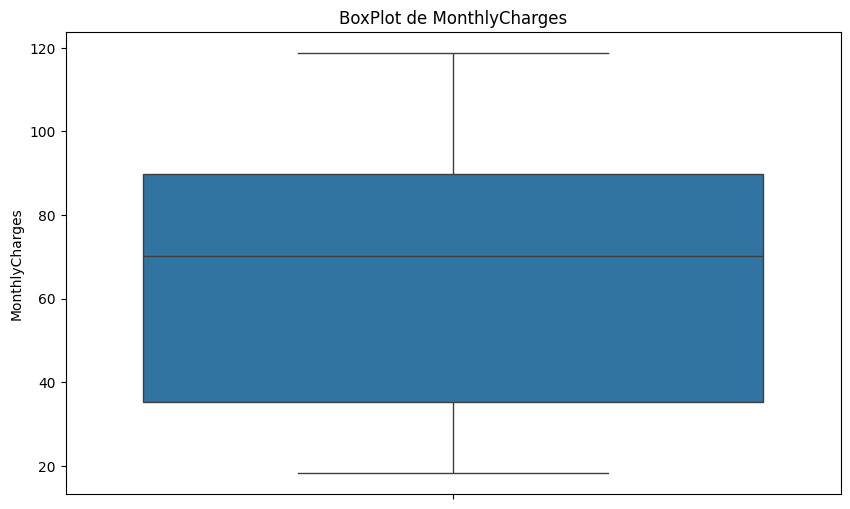

In [10]:
# BOX-PLOT MONTHLY CHARGES
plt.figure(figsize=(10,6))
sns.boxplot(df['MonthlyCharges'])
plt.title("BoxPlot de MonthlyCharges")
plt.show()

Nos encontramos un **Box Plot** que nos muestra que la mediana de los cargos está alrededor de los 70€. La caja es relativamente grande, lo que nos demuestra que los clientes están muy repartidos entre esas cifras.
Los bigotes de este diagrama de caja nos muestra que en el dataset hay personas que han pagado desde 20€ a alrededor de 120€. 
- El 50% de lo clientes pagan entre 38€ y 90€ aproximadamente (Segundo Cuartil 50%).
- El 25% de los clientes pagan entre 20€ y 38€ aprox (Primer Cuartil 25%)
- El 75% de los clientes pagan entre 20€ y 90€ aprox (Tercer Cuartil 75%)

Resaltamos también que no tenemos valores atípicos

### TENURE
Antigüedad del cliente en meses. Una variable importante

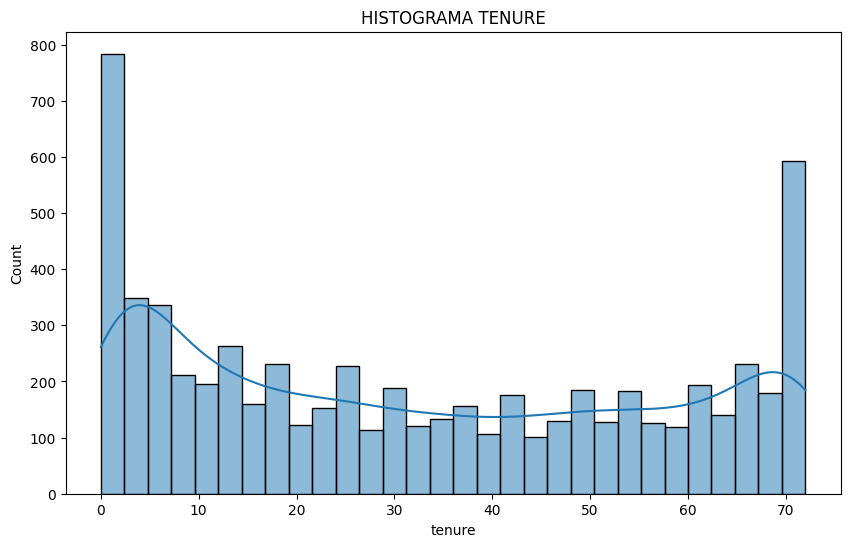

In [11]:
# HISTOGRAMA TENURE
# TENURE ES: Antigüedad del cliente en meses
plt.figure(figsize=(10,6))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title("HISTOGRAMA TENURE")
plt.show()

En este gráfico podemos ver como la mayoría de clientes tiene una antiguedad muy temprana, de 1 a 2 meses aprox. También podemos ver un pico grande en clientes con más antiguedad, lo que nos demuestra que esos clientes son más fieles. En general entre medias es una masa muy heterogénea.

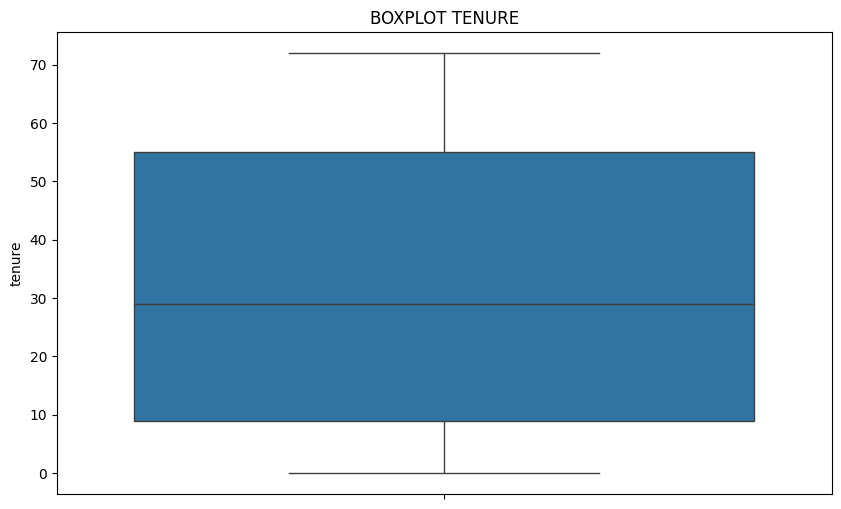

In [12]:
# BOXPLOT TENURE
plt.figure(figsize=(10,6))
sns.boxplot(df['tenure'])
plt.title("BOXPLOT TENURE")
plt.show()

Otro boxplot sin valores atípicos que nos muestra que la **mediana** de los clientes, tienen una antiguedad de aproximadamente 30 meses y que los clientes que se encuentran en el Rango Intercuartílico están muy separados entre sí, desde los 10 meses hasta los 55 meses aprox. 
Los bigotes del gráfico nos indican que hay clientes con antiguedades entre 1 y 74 meses aprox.

### CONTRACT

Contract
Month-to-month    3489
Two year          1526
One year          1323
Name: count, dtype: int64


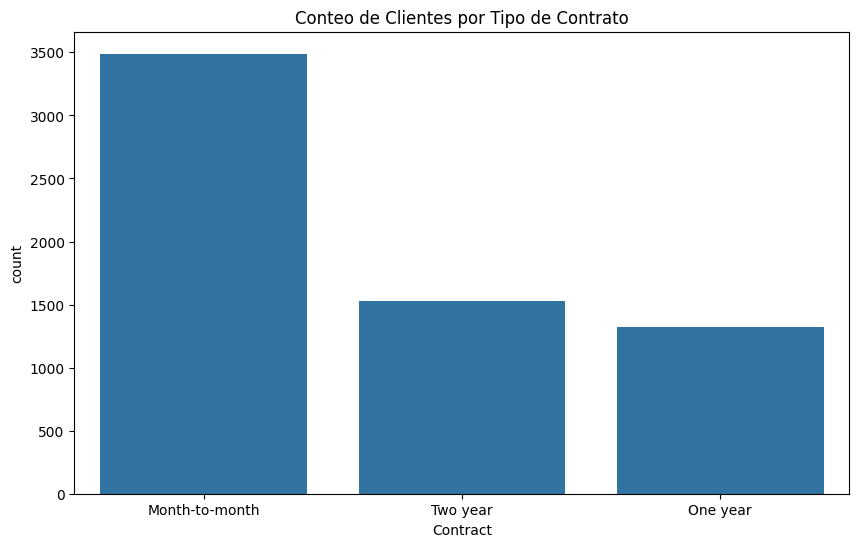

In [13]:
# Tipos de contrato
print(df['Contract'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', order=df['Contract'].value_counts().index)
plt.title('Conteo de Clientes por Tipo de Contrato')
plt.show()

Aquí podemos observar como la mayoría de los clientes tienen contrato Month-to-Month, lo que los convierte en clientes volátiles, pues cada mes pueden decidir irse a otra compañía, mientras que los clientes que tienen un contrato más largo, como de uno o dos años, están atados a él, y si no les penalizan

## ANALIZANDO TENDENCIAS

### ¿Influye el tipo de contrato en la decisión de irse?

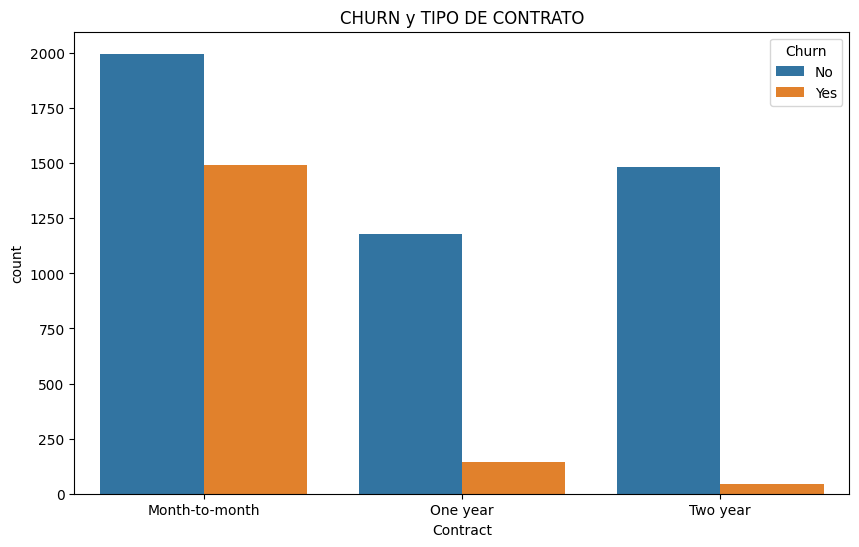

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("CHURN y TIPO DE CONTRATO")
plt.show()

El abandono está masivamente concentrado en los clientes con contrato "Mes a mes". Digamos que este contrato no genera fricción en el cliente al decidir irse, sin embargo los de "One Year" y "Two Year" ya son leales y están sujetos a ese contrato.

### ¿Influye el Cargo Mensual en la decisión de irse?

Text(0.5, 1.0, 'MONTHLY CHARGES y CHURN')

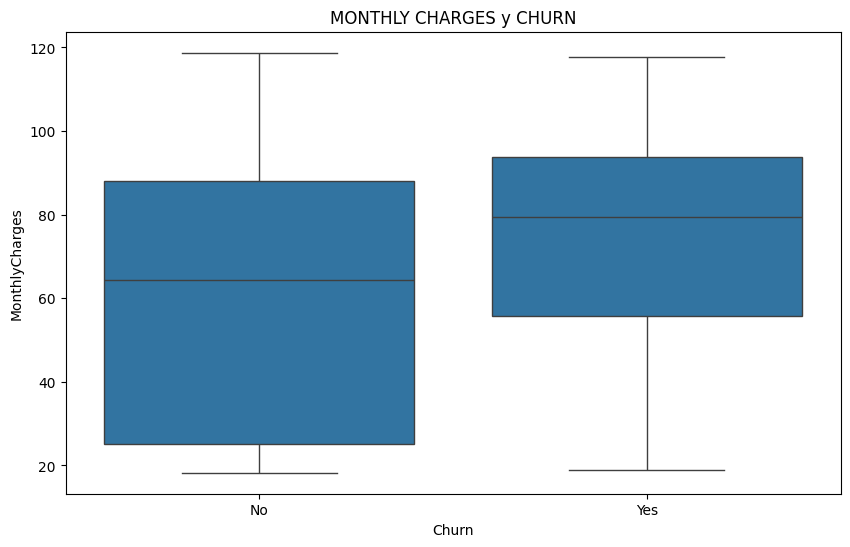

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("MONTHLY CHARGES y CHURN")

Aquí podemos ver como las personas que se van (Churn = Yes) tienden a pagar más que los que no se van. La mediana está sobre los 80€ al mes. **Hipótesis**: Seguramente los clientes con contratos Month to Month tienden a pagar más y los clientes con contratos más largos tienen promociones y terminan pagando menos al mes, y por eso la gráfica de "Churn=No" tiene una mediana más baja. 

### ¿Influye la Antiüedad en la decisión de irse?

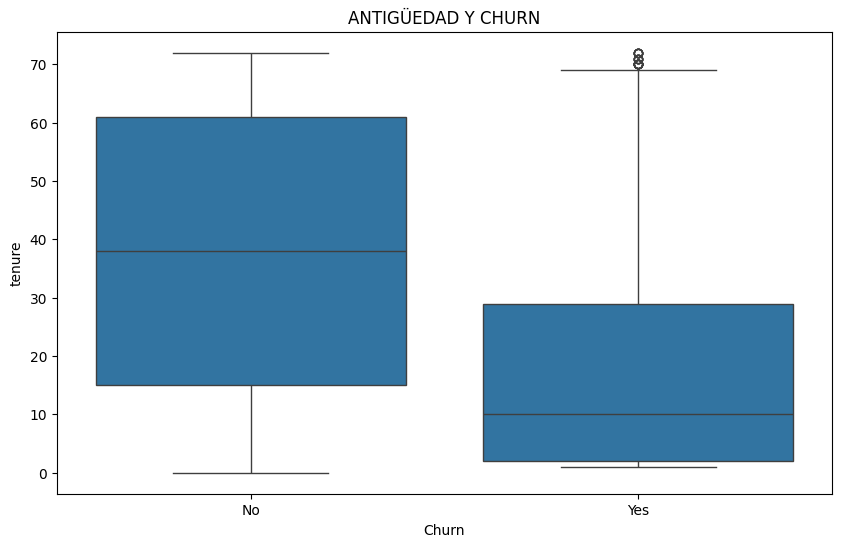

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title("ANTIGÜEDAD Y CHURN")
plt.show()

Los clientes que abandonan (Churn=Yes) son claramente, clientes nuevos o recientes. La lealtad del cliente aumenta con el tiempo.

## CONCLUSIONES

Los datos nos cuentan una historia muy clara: El perfil de cliente con mayor riesgo de abandono es aquel que tiene un contrato 'Mes a mes' y que, además, es un cliente relativamente nuevo con baja antigüedad. Si a esto le sumamos que está pagando una factura mensual alta, pues tenemos el cóctel de churn perfecto :)

El problema de esta empresa (TELCOM) no es el servicio en sí, sino la estrategia de retención de clientes inicial.

Tendríamos que crear un segmento de clientes, que podemos llamar **Alto Riesgo** y que cumplan las siguientes condiciones:
- Contrato Mes a Mes
- Antigüedad de menos de 12 meses
- Y una factura mensual de >70€

A este segmento es al que le deberíamos de ofrecer incentivos y promociones (servicios adicionales etc...), para, por ejemplo, que se conviertan al contrato de 1 o 2 años que hemos visto que tiene más retención de clientes